# ```Mesa``` Tutorial #

### What is ```Mesa```? ###
```Mesa``` is a modular framework for building, analyzing and visualizing agent-based models.

### Instalation ###
```Mesa``` can be installed via ```pip3 install mesa```.

### What are Agent-Based Models? ###
Agent-based models are computer simulations involving multiple concrete/abstract entities (i.e. ```agents```) acting and interacting with one another based on their programmed behavior. We may have an understanding of how the individual components of a system behave, and want to see what system-level behaviors/effects (and vice-versa). 

### Main Modules ###
```Mesa```'s components are kept separate but intended to work together. Modules are grouped into 3 categories:
- ```Modeling```: used to build the models (usually a ```model``` and ```agent``` classes, a ```scheduler``` that determine the sequence in which agents act, and ```space``` for them to move);
- ```Analysis```: tools to collect data generated from the ```model``` or run it multiple times with different parameters;
- ```Visualization```: creates interactive visualization, using a JavaScript server;

### Models ###
**```Agent(unique_id, model)``` Class**<br>
Agents are the *unique individual entities that act in the model* and can either be remove/deleted (via ```remove()```) or take a single step (via ```step()```). Agents positions are stored in the ```pos``` variable (tuple with 2 coordinates, x/y, set via ```place_agent```). 

**```Grid``` Class**<br>
Some models need a spatial element for agents to move around and interact with neighbors (by proximity). There's 2 kinds of spaces:
- ```Grid```: divided into cells where agents can be on (like a chess board); the most common ones are:
    - ```SingleGrid```: rectangular, toroidal, grid that enforces at most one agent per cell;
    - ```MultiGrid```: rectangular, toroidal, grid that allows multiple agents per cell;
    - ```HexSingleGrid```/```HexMultiGrid```: hexagonal tiling grid similar to ```SingleGrid```/```MultiGrid```;
    - ```NetworkGrid```: graph grid where each node contains 0+ agents;
- ```Continuous```: allows agents to have any arbitrary position;

Both spaces are *toroidal*, meaning the edges wrap around the space (cells on the right edge connect to those on the left edge; same for bottom-top edges). This feature is controlled by the ```torus``` parameter.

**```Scheduler``` Class**<br>
The ```scheduler``` *controls the order in which agents are activated*, making agents to take their defined action. The scheduler is also *responsible for advancing the model by one ```step```* (the smallest unit of time, also referred as ```tick```). At each ```step```, the agents are activated, changing internally and/or interacting with others.

The ```scheduler``` can be configured to activate agents in different orders (the order in which agents are activated can impact the results), as seen below:
- ```RandomActivation```: activates agents in random order (order is reshuffled on each ```step```);
- ```SimultaneousActivation```: activates agents simultaneously (useful in scenarios where interactions are sensitive to the order of execution);
- ```StagedActivation```: activates agents, divided into several stages (agents execute one stage before moving to the next);

**```DataCollector``` Class**<br>
In order for us to know each agent's parameters at each step, we'd have to add that feature to the loop and store the data somehow.

The data collector stores 3 categories of data: 
- *Model-level variables*: takes a model object as an input;
- *Agent-level variables* takes an agent object as an input;
- *Tables*: catch-all for everything else;

At every ```step```, data collector will collect and store the model-level current Gini coefficient, as well as each agent’s parameters. Data collector stores the data in a dictionary, with ```step``` number as *key*, and a dictionary of agent IDs and variable value pairs as *value*. The data collector then converts this dictionary into a *DataFrame*, which is why the index is a pair of *(model step, agent ID)*.

### Main Functionality ###
**```Agent``` Class**<br>
- ```unique_id```: agent unique identifier;
- ```model```: reference to model;
- ```pos```: agent's position coordinates (x,y);
- ```remove()```: remove agent from the model;
- ```step()```: single step of agent (i.e. agent actions);

**```Model``` Class**<br>
- ```running```: bool if model is running;
- ```schedule```: object to manage the order/execution of agent steps;
- ```current_id```: counter for assigning unique IDs to agents;
- ```_agents```: ```defaultdict``` mapping each agent type to a its instances;
- ```agents```: returns ```AgentSet``` (collection class that represents an ordered set of agents) of all agents in the model;
- ```agent_types```: returns a list of different agent types;
- ```get_agents_of_type(agenttype)```: returns ```AgentSet``` with all agents of specified type;
- ```step()```: single step (i.e. model actions);
- ```run_model()```: runs model until the end condition is reached;
- ```next_id()```: returns next agent ID;
- ```reset_randomizer(seed)```: resets the random number generator seed;

**```Scheduler``` Class**<br>
- ```model```: model instance associated with ```scheduler```;
- ```steps```: number of steps the scheduler has taken;
- ```time```: current time in simulation;
- ```agents```: returns list of all agent instances;
- ```add()```: adds an agent to the scheduler;
- ```remove()```: removes an agent from the scheduler;
- ```step()```: executes a step (activates all agents once);
- ```get_agent_count()```: returns number of agents;

**```Grid (PropertyLayer)``` Class**<br>
- ```name```: property layer name;
- ```width```: width of the ```grid``` (columns);
- ```height```: height of the ```grid``` (rows);
- ```data```: array with grid data;
- ```set_cell(position,value)```: updates cell's value in-place;
- ```set_cells(value,condition)```: batch updates all cells' values in-place (optionally based on condition);
- ```modify_cell(position,operation,value)```: updates cell using an operation (can be ```lambda```; value is used as function parameter);
- ```modify_cells(operation,value)```: batch updates all cells using an operation (can be ```lambda```; value is used as function parameter);
- ```select_cells(condition)```: finds cells that meet condition in-place;

**```Grid``` Class**<br>
- ```width```: width of the ```grid``` (columns);
- ```height```: height of the ```grid``` (rows);
- ```torus```: bool to determine if grid is a torus (wrapped);
- ```empties```: tuples for all empty cells;
- ```place_agent(agent,pos)```: places agent on location;
- ```remove_agent(agent)```: removes agent from grid (```pos``` set to ```None```);
- ```coord_iter()```: iterator with positions and as cell contents;
- ```exists_empty_cells()```: ```True``` if any emoty cells (```False```, otherwise);
- ```get_neighborhood(pos,moore,include_center,radius)```: list of cells in the neighborhood of ```pos```;
- ```get_neighbors(pos,moore,include_center,radius)```: list of neighbors of ```pos```;
- ```is_cell_empty(pos)```: bool of cell's contents;
- ```iter_neighborhood(pos,moore,include_center,radius)```: iterator over cell coordinates in neighborhood of ```pos```;
- ```iter_neighbors(pos,moore,include_center,radius)```: iterator over neighbors of ```pos```;
- ```move_agent(agent,pos)```: moves agent from current position to ```pos```;
- ```move_to_empty(agent)```: moves agent to a random empty cell;
- ```select_cells(conditions,extreme_values,masks,only_empty,return_list)```: list cells based on parameters;
- ```swap_pos(agent_a,agent_b)```: swaps agents positions;

**```DataCollector``` Class**<br>
- ```model_reporters```: mapping model reporter to attributes/functions/methods;
- ```agent_reporters```: mapping agents reporter to attributes/functions/methods;
- ```collect(model)```: collects all data for given model (model or agents);
- ```get_model_vars_dataframe()```: ```DataFrame``` from model variables (```column``` for each model variable / ```index``` for model ```steps```);
- ```get_agent_vars_dataframe()```: ```DataFrame``` from agents variables (```columns``` for each agent variable, ```steps``` and agent id);

### Documentation ###
- ```Mesa``` Reference - [Link](https://mesa.readthedocs.io/en/stable/overview.html);
---

### Importing Dependencies ###

In [58]:
import yaml
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import mesa

### User-Defined Classes ###

In [59]:
class MoneyAgent(mesa.Agent): # 'mesa.Agent' as parent class
    def __init__(self, unique_id, model):
        # Instantiating parent class
        super().__init__(unique_id, model)
        # Attributes
        self.wealth = 1

    def move(self):
        # 'get_neighborhood()': getting a list of neighbor cells
        move_options = self.model.grid.get_neighborhood(self.pos, # (from '_Grid' base class) Coordinate tuple
                                                        moore=True, # True: includes diagonals in neighborhood / False: otherwise
                                                        include_center=False) # True: includes 'pos' cell / False: otherwise
        move_cell = self.random.choice(move_options) # Randomly choosing
        self.model.grid.move_agent(self, move_cell) # Moving agent

    def money_exchange(self):
        # 'get_cell_list_contents()': returns iterator of agents in cell ('pos')
        #                             cells with empty content are excluded
        candidates = self.model.grid.get_cell_list_contents([self.pos])
        candidates.pop(candidates.index(self)) # Ensuring agent (self) from candidates
        if len(candidates) > 1: # If there're agents in same cell...
            # Choosing a random agent
            other_agent = self.random.choice(candidates)
            # Wealth exchange
            other_agent.wealth += 1
            self.wealth -= 1
    
    def step(self):
        # Moving agent
        self.move()
        # Verifying wealth
        if self.wealth > 0:
            self.money_exchange()

In [60]:
class MoneyModel(mesa.Model): # 'mesa.Model' as parent class
    def __init__(self, n, width=10, height=10):
        # Attributes
        self.num_agents = n
        self.schedule = mesa.time.RandomActivation(self) # MUST be named 'schedule'
                                                         # Agents activated in random order
        self.grid = mesa.space.MultiGrid(width, height, True) # Multiple agents allowd in same cell
        self.data_collector = mesa.DataCollector(model_reporters={"gini": self.gini}, # Mapping model/function (dict)
                                                 agent_reporters={"wealth": "wealth"}) # Mapping agent/attribute (dict)

    def create_agents(self):
        for i in range(self.num_agents):
            # Instantiating 'MoneyAgent' class
            _ = MoneyAgent(i, self) # 'unique_id' and 'model' as params
            # Adding to 'scheduler'
            self.schedule.add(_)
            # Adding agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(_, (x, y)) # Placing the agent

    def step(self):
        self.data_collector.collect(self) # Collecting data
        self.schedule.step() # Calls each agent's 'step()'

    def gini(model):
        # Listing all agents' 'wealth'
        wealth_lst = [agent.wealth for agent in model.schedule.agents]
        sorted_wealth_lst = sorted(wealth_lst)
        num_agents = model.num_agents
        B = sum(wealth * (num_agents - idx) for idx,wealth in enumerate(sorted_wealth_lst)) / (num_agents * sum(sorted_wealth_lst))
        return 1 + (1/num_agents) - 2*B

### Main ###
**Example**: In this agent-based economy simulation, individual economic ```agents``` begin with 1 unit of money. At every ```step``` of the model, an ```agent``` gives 1 unit of money (if they have it and share the same cell) to some other agent.

In [61]:
# Reading the YAML config
with open("./mesa.yaml", "r") as _stream:
    yaml_config = yaml.safe_load(_stream)

In [62]:
# Instantiating the 'MoneyModel' class (with 10 agents)
model = MoneyModel(50, 10, 10)
# Placing the agents
model.create_agents()
# Stepping 
for i in range(25):
    model.step()

/var/folders/d5/r7137fcs1ygfqj4qz68zfcp00000gn/T/ipykernel_26782/1767769389.py:4: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


**Visualization**

In [113]:
# Creating data
_x_labels = list(range(model.grid.width))
_y_labels = list(range(model.grid.height))
# Creating a zero matrix (with same aspect as grid)
_values = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter(): # 'coord_iter': iterator with cells' positions/contents
    _values[x][y] = len(cell_content)

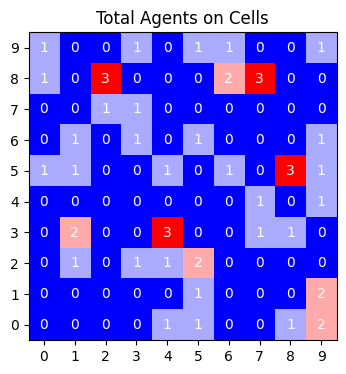

In [121]:
## Plot
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (4, 4))
img = ax.imshow(np.transpose(_values), origin="lower", cmap="bwr") # 'imshow()': displays data as a 2d-image
# Ticks
ax.set_xticks(np.arange(len(_x_labels)), labels=_x_labels)
ax.set_yticks(np.arange(len(_y_labels)), labels=_y_labels)
# Annotations
for x in range(len(_x_labels)):
    for y in range(len(_y_labels)):
        ax.annotate(int(_values[x][y]), 
                    xy= (x, y), xycoords= "data", # Text coords
                    xytext= (0,0), textcoords= "offset points", # Text offset
                    ha= "center", va="center", color="white", fontsize= 10); # kwargs
# Title
ax.set_title("Total Agents on Cells");

In [189]:
# Creating wealth data
binwidth = 1
wealth_lst = [agent.wealth for agent in model.schedule.agents] # 'agents': list of all agent instances
_x = list(set(wealth_lst))
_y = np.histogram(wealth_lst, bins=len(set(wealth_lst)))[0]

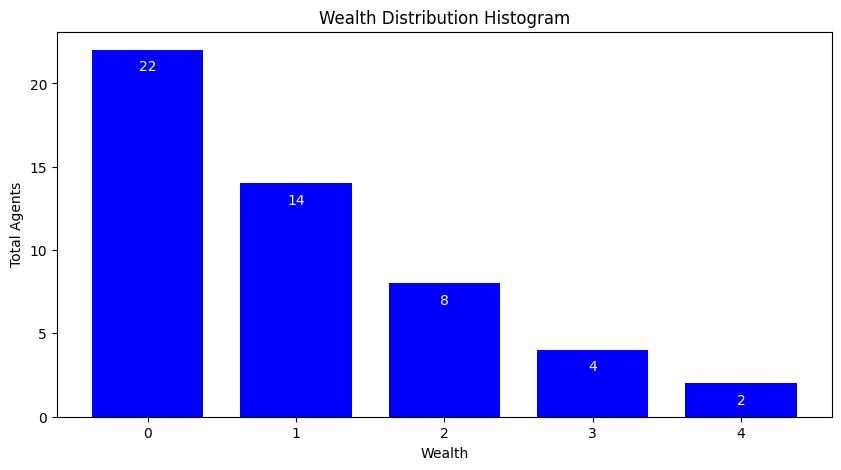

In [199]:
## Plot
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 5))
ax.bar(x=_x, height=_y, width=0.75, align= "center", color= "blue")
# Annotations (Labels)
for each in zip(_x,_y):
    ax.annotate(each[1],
                xy= (each[0], each[1]), xycoords= "data", # Text coords
                xytext= (0,-15), textcoords= "offset points", # Text offset
                ha= "center", color= "white", fontsize= 10) # kwargs
# Labels
ax.set_xlabel("Wealth")
ax.set_ylabel("Total Agents") # If 'density=True', this would be the probability density
# Title
ax.set_title("Wealth Distribution Histogram");

In [209]:
# Creating wealth data
_df = model.data_collector.get_model_vars_dataframe()
_x = _df.index.values
_y = _df["gini"].to_numpy().round(decimals=2)

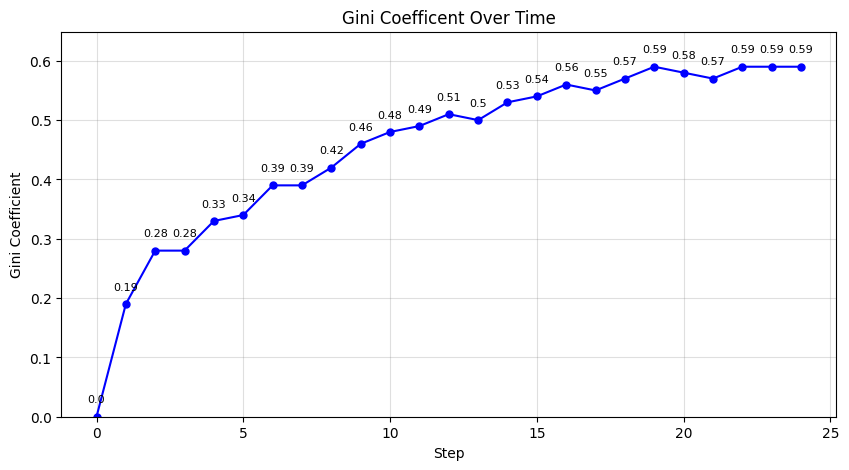

In [229]:
## Plot
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 5))
ax.plot(_x, _y, linewidth= 1.5, marker= "o", markersize= 5, color= "blue")
# Labels
ax.set_xlabel("Step")
ax.set_ylabel("Gini Coefficient")
# Limits
ax.set_ylim(bottom=min(_y)*0.9, top=max(_y)*1.1)
# Annotations (Labels)
for each in zip(_x,_y):
    ax.annotate(each[1],
                xy= (each[0], each[1]), xycoords= "data", # Text coords
                xytext= (0,10), textcoords= "offset points", # Text offset
                ha= "center", color= "black", fontsize= 8) # kwargs
# Title
ax.set_title("Gini Coefficent Over Time", loc= "center") 
# Grid
ax.grid(which="both", color= "gray", alpha=0.25)

In [222]:
# Creating wealth data
agents_wealth = model.data_collector.get_agent_vars_dataframe() # 'get_agent_vars_dataframe()': agent wealth at each step
                                                                #                               columns: 1 for variable ('wealth'), step ('Step') and agent_id ('AgentID')
agents_wealth = agents_wealth.reset_index() # Removing multindex
agents_wealth.head()

,Step,AgentID,wealth
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


In [228]:
# Isolating a given agent (AgentID=8)
a10_wealth = agents_wealth[agents_wealth["AgentID"]==8].reset_index(drop=True)
a10_wealth.head()

,Step,AgentID,wealth
0,0,8,1
1,1,8,1
2,2,8,1
3,3,8,1
4,4,8,1


In [231]:
# Creating agent data
_x = a10_wealth["Step"].to_numpy()
_y = a10_wealth["wealth"].to_numpy()

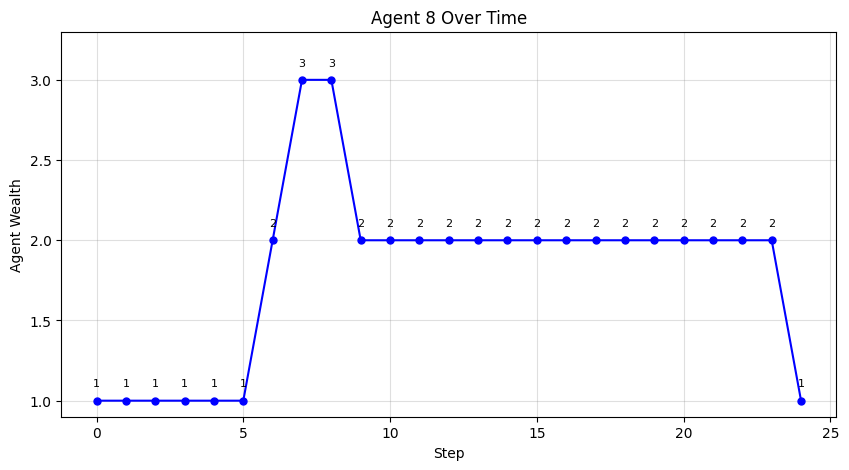

In [236]:
## Plot
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 5))
ax.plot(_x, _y, linewidth= 1.5, marker= "o", markersize= 5, color= "blue")
# Labels
ax.set_xlabel("Step")
ax.set_ylabel("Agent Wealth")
# Limits
ax.set_ylim(bottom=min(_y)*0.9, top=max(_y)*1.1)
# Annotations (Labels)
for each in zip(_x,_y):
    ax.annotate(each[1],
                xy= (each[0], each[1]), xycoords= "data", # Text coords
                xytext= (0,10), textcoords= "offset points", # Text offset
                ha= "center", color= "black", fontsize= 8) # kwargs
# Title
ax.set_title("Agent 8 Over Time", loc= "center") 
# Grid
ax.grid(which="both", color= "gray", alpha=0.25)

---